In [1]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 165MB/s]
100% 1.06G/1.06G [00:06<00:00, 180MB/s]


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image= tf.cast(image/255., tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [8]:
# create CNN model

model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.4239 - accuracy: 0.5513 - val_loss: 0.6581 - val_accuracy: 0.5704
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6600 - accuracy: 0.6149 - val_loss: 0.6001 - val_accuracy: 0.6976
Epoch 3/10
625/625 [==============================] - 65s 102ms/step - loss: 0.6058 - accuracy: 0.6790 - val_loss: 0.5886 - val_accuracy: 0.7008
Epoch 4/10
625/625 [==============================] - 79s 126ms/step - loss: 0.5582 - accuracy: 0.7237 - val_loss: 0.6089 - val_accuracy: 0.6780
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5511 - accuracy: 0.7361 - val_loss: 0.5785 - val_accuracy: 0.7232
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5095 - accuracy: 0.7613 - val_loss: 0.5409 - val_accuracy: 0.7370
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4894 - accuracy: 0.7750 - val_loss: 0.6263 - val_ac

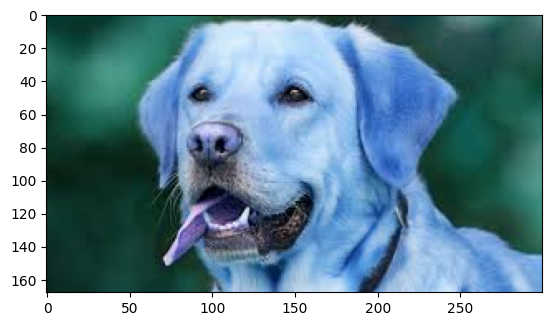

In [20]:
import cv2
import matplotlib.pyplot as plt
test_img= cv2.imread('/download (2).jpeg')
plt.imshow(test_img)


In [21]:
test_img= cv2.resize(test_img,(256,256))
test_input= test_img.reshape(1,256,256,3)

In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 39ms/step


array([[0.19422263]], dtype=float32)